In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

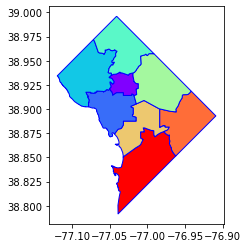

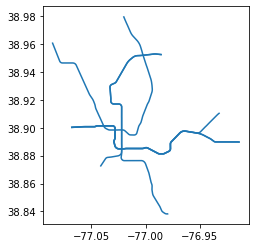

In [3]:
wards = gpd.read_file('./data/dcgis/Wards_from_2022.shp')
stations = gpd.read_file('./data/dcgis/Metro_Stations_in_DC.shp')
metro_lines = gpd.read_file('./data/dcgis/Metro_Lines.shp')

wards.plot(cmap='rainbow', edgecolor='#0000ff', column='NAME')
metro_lines.plot()

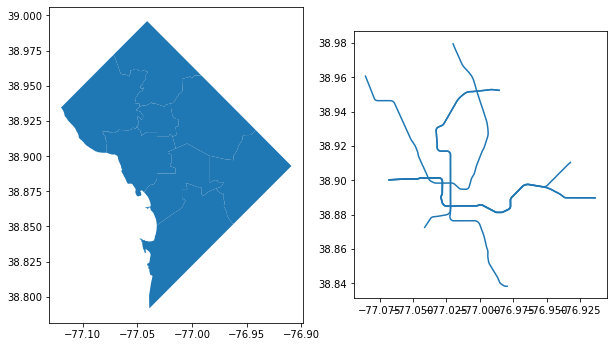

In [4]:
# Plot data side-by-side
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(10,8))
wards.plot(ax = ax1)
metro_lines.plot(ax = ax2)

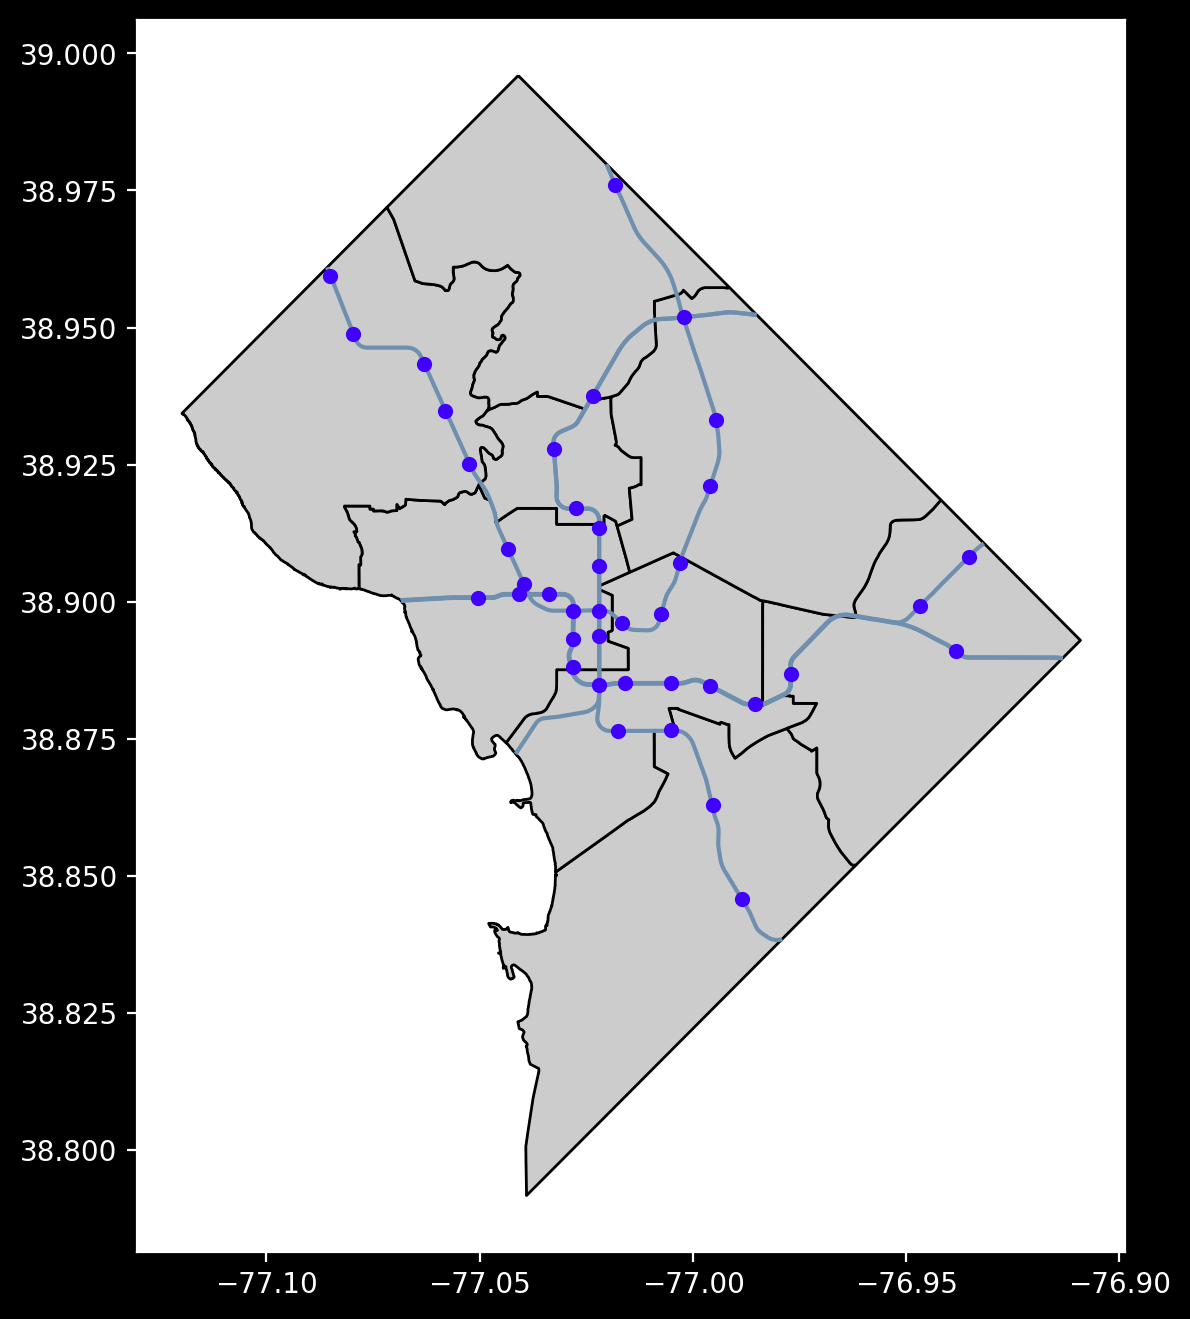

In [55]:
# Plot data as multiple layers
fig, ax1 = plt.subplots(figsize=(10,8))
ax1.set_facecolor('white')
wards.plot(ax=ax1, color='#cccccc', edgecolor='black', zorder=0)
metro_lines.plot(ax=ax1, color='#6F8FAF', zorder=1)
stations.plot(ax=ax1, color='#3F00FF', zorder=2, markersize=20)

In [5]:
wards.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

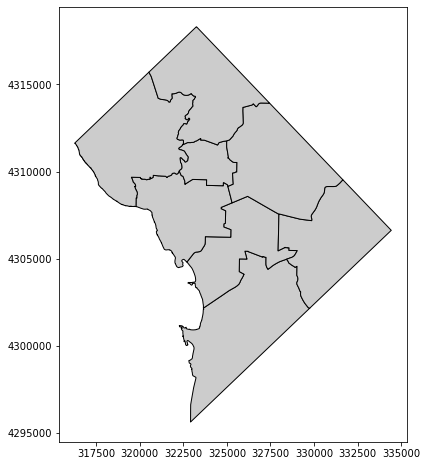

In [6]:
# NAD83 / UTM 18N - EPSG:26918

w = wards.to_crs(epsg=26918)
fig2, ax2 = plt.subplots(figsize=(10,8))
w.plot(ax=ax2, color='#cccccc', edgecolor='black')


In [7]:
# calculate area in sq km
w['AREA'] = w.geometry.area / (10**6)
w[['NAME', 'AREA']]

,NAME,AREA
0,Ward 8,32.350947
1,Ward 6,17.616809
2,Ward 7,23.995497
3,Ward 2,18.358365
4,Ward 1,6.572937
5,Ward 5,26.931379
6,Ward 3,28.323541
7,Ward 4,23.316446
